In [1]:
#  画像を読み込んで表示する　(jpg,pngなどはPILで読み込める)
# import PIL
# DICOMを読み込むときはpydicomをインストールする
#!pip install pydicom
import pydicom
# https://3dicomviewer.com/dicom-library/ 
# Circle of Willis からダウンロードしたファイル
d = pydicom.dcmread('1-001.dcm')
# メタデータを表示
# タグ一覧　https://www.liberworks.co.jp/know/know_dicomTag.html
print(d)
# 特定のヘッダにアクセスする
print(d.PatientName, d[0x0010,0x0010].value)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.1188.4001.315347154374295053434961763088
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
(0008, 0012) Instance Creation Date              DA: '20010302'
(0008, 0013) Instance Creation Time              TM: '041530'
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.14519.5.2.1.118

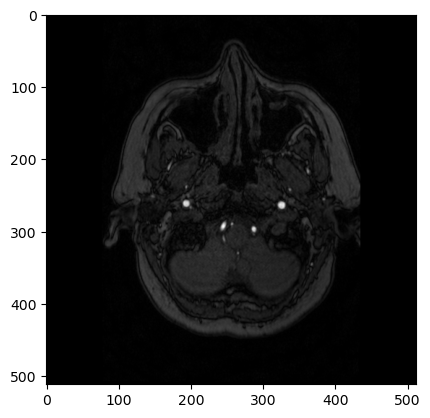

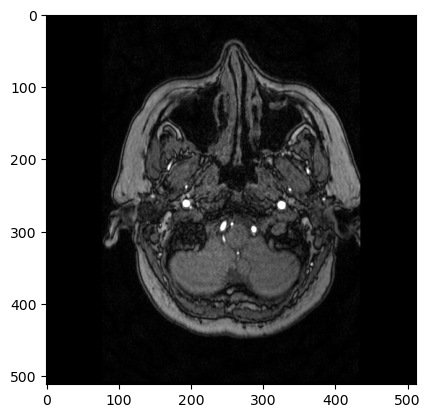

In [2]:
# 画像に合わせて諧調を調整
def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    return window_image

def convert_to_8bit(image):
    image_8bit = np.clip(image, 0, 255).astype('uint8')
    return image_8bit

import numpy as np 
import matplotlib.pyplot as plt

d = pydicom.dcmread('1-001.dcm')
img = d.pixel_array
wc = (np.max(img) + np.min(img)) // 2
ww = np.max(img) - np.min(img)
windowed_image = window_image(img, wc, ww)
image8bit = convert_to_8bit(windowed_image)
plt.imshow(img, 'gray')
plt.show()
plt.imshow(image8bit, 'gray')

In [3]:
import glob 
files = glob.glob("Covid Scans/*/*/*.dcm")
#print(files)
print(len(files))

0


In [4]:
for f in files[100:101]:
    d = pydicom.dcmread(f)
    img = d.pixel_array
    wc = (np.max(img) + np.min(img)) // 2
    ww = np.max(img) - np.min(img)
    windowed_image = window_image(img, wc, ww)
    image8bit = convert_to_8bit(windowed_image)
    plt.imshow(img, 'gray')
    plt.show()
    # これは調整がうまくいっていない例
    plt.imshow(image8bit, 'gray')
    plt.show()